# MANE-4962 HW 5
Name: Jean Pasato
RIN: 661955756

In [13]:
### PROBLEM 1A: Implement the convolutional neural network architecture

import tensorflow as tf
from tensorflow.keras import layers, datasets, models
import matplotlib.pyplot as plt

# Load data into testing and training for an XY coordinate system for CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Define the number of classes and define an image vector as a binary class matrix
number_of_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, number_of_classes)
y_test = tf.keras.utils.to_categorical(y_test, number_of_classes)

# Convert to "float" object type
x_train = x_train.astype('float32')/ 255
x_test = x_test.astype('float32')/ 255

# Convolution Neural Network
"""
First Layer: 2D Convolution Layer with 64 filters, each of size (5,5)
and uses the ReLU activation function. Input shape of layer corresponds
to the dimensions of the input image.
"""
l1 = layers.Conv2D(64, (5,5), activation = 'relu', input_shape = (32, 32, 3))
"""
Second Layer: Max Pooling Layer of size (2,2).
"""
l2 = layers.MaxPooling2D((2, 2))
"""
Third Layer: 2D Convolution Layer with 32 filters, each of size (3,3),
and uses the ReLU activation function.
"""
l3 = layers.Conv2D(32, (3, 3), activation = 'relu')
"""
Fourth Layer: Max Pooling Layer of size (2,2)
"""
l4 = layers.MaxPooling2D((2, 2))
"""
Fifth Layer: 2D Convolution layer with 32 filters, each of size (3,3),
and uses the ReLU activation function.
"""
l5 = layers.Conv2D(32, (3, 3), activation = 'relu')
"""
Sixth Layer: Flattened layer which converts the output of the previous layer
into a one-dimensional vector.
"""
l6 = layers.Flatten()
"""
Seventh Layer: Dense layer with 64 neurons and uses the ReLU activation function.
"""
l7 = layers.Dense(64, activation = 'relu')
"""
Eighth Layer: Produces estimated probabilities to classify the CIFAR-10 classes.
"""
l8 = layers.Dense(10, activation = 'softmax')

# Combined Model
model = models.Sequential([l1, l2, l3, l4, l5, l6, l7, l8])

# Compile Model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
782/782 [==============================] - 37s 45ms/step - loss: 1.7108 - accuracy: 0.3715 - val_loss: 1.4432 - val_accuracy: 0.4728
Epoch 2/10
782/782 [==============================] - 39s 49ms/step - loss: 1.3823 - accuracy: 0.5014 - val_loss: 1.3220 - val_accuracy: 0.5216
Epoch 3/10
782/782 [==============================] - 38s 48ms/step - loss: 1.2544 - accuracy: 0.5528 - val_loss: 1.2381 - val_accuracy: 0.5543
Epoch 4/10
782/782 [==============================] - 37s 47ms/step - loss: 1.1685 - accuracy: 0.5838 - val_loss: 1.1431 - val_accuracy: 0.5859
Epoch 5/10
782/782 [==============================] - 38s 48ms/step - loss: 1.0933 - accuracy: 0.6135 - val_loss: 1.0907 - val_accuracy: 0.6097
Epoch 6/10
782/782 [==============================] - 39s 49ms/step - loss: 1.0387 - accuracy: 0.6328 - val_loss: 1.0969 - val_accuracy: 0.6094
Epoch 7/10
782/782 [==============================] - 39s 50ms/step - loss: 0.9878 - accuracy: 0.6521 - val_loss: 1.0363 - val_accuracy:

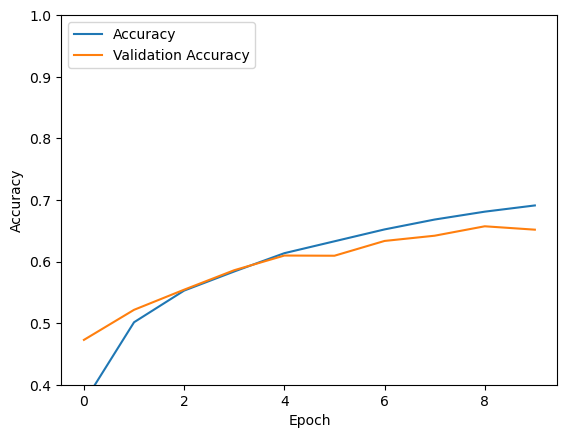

In [14]:
### PROBLEM 1B:

# Calculate training and validation accuracies of CNN of 10 epochs and a batch size of 64
history = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_data = (x_test, y_test))

# Plot
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc = 'upper left')
plt.show()


In [3]:
### PROBLEM 2A:

"""
Use Scikit-learn breast cancer dataset and SVM classifiers to classify breast cancer.
Use worst compactness, worst concavity, and worst area features ONLY.
"""

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Loading breast cancer data
bc = load_breast_cancer()

# Define features and target
X = pd.DataFrame(bc.data, columns=bc.feature_names)
y = bc.target

# Select worst compactness, concavity and area features
X = X[['worst compactness', 'worst concavity', 'worst area']]

# Scaling features
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=0)

# Setup Linear SVM
svm_model = SVC(kernel='linear')

# Fit SVM Model
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Linear Kernel): {:.2f}".format(accuracy))

Accuracy (Linear Kernel): 0.93


In [5]:
### PROBLEM 2B:

"""
Use classification model with a radial basis function kernel with
regularization strength parameter C = 2.
"""
### Set up Radial Basis Function Kerenel SVM
svm_rbf = SVC(C=2, kernel='rbf', gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy (with RBF Kernel): {:.2f}".format(accuracy_rbf))


Accuracy (with RBF Kernel): 0.94
